In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
mca = pd.read_csv("marketing_customer_analysis.csv")

In [3]:
mca.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
mca.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

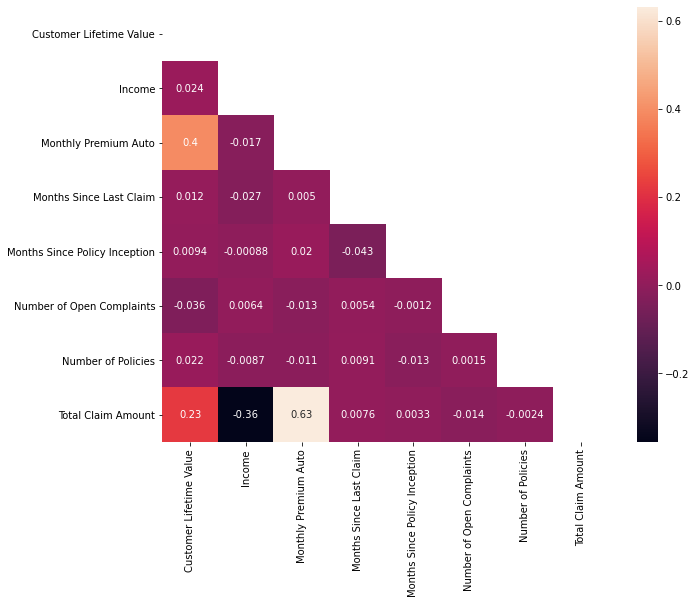

In [5]:
#Deciding on Dependent and independent variables
#create a heatmap first



#wrap this into a heatmap

import numpy as np

#make list with numerical data

mca_num = mca.select_dtypes(include = np.number)

#define a mask first, a mask is an arry that has the same dimension as our heatmap, and it consist only of zero

mask=np.zeros_like(mca.corr())

#klappt die heatmap diagnoal zusammen, damit keine doppelten einträge haben

mask[np.triu_indices_from(mask)]=True

#plot it, and tell heatmap to use the mask

fig, ax=plt.subplots(figsize=(10, 8))

ax=sns.heatmap(mca.corr(), mask=mask, annot=True)

plt.show()



In [6]:
mca_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [7]:
# DEPENDENT Variable
y = mca['Customer Lifetime Value']

# Independent variable
x = mca[['Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']]

In [8]:
y

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Customer Lifetime Value, Length: 9134, dtype: float64

In [9]:
x

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,198.234764
9130,21604,79,14,28,0,1,379.200000
9131,0,85,9,37,3,2,790.784983
9132,21941,96,34,3,0,3,691.200000


### x-y split





In [10]:
# We want to split so that we have 60% of the whole data as testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

In [11]:
for data in (X_train, X_test, y_train, y_test):
    print(len(data))

3653
5481
3653
5481


### Normalize | Transform Data so the distribution is normal

In [12]:
# since the data os strictly positive we can use boxplot

In [13]:
#check if x_train data is positive

mca[['Income']]

,Income
0,56274
1,0
2,48767
3,0
4,43836
...,...
9129,71941
9130,21604
9131,0
9132,21941


In [14]:
#create functions that checks the columns for zeros

def check_for_zeros(column):
    zeros = 0
    for i in range(len(list(column))):
        if column[i] == 0:  
            zeros= zeros +1
    return zeros
        

In [15]:
check_for_zeros(mca['Income'])

2317

In [ ]:
#### Ask Andres ##### 

#create function that replaces zeros with mean

def replace_zeros(column):
    if check_for_zeros(column) > 0:
        mean = np.sum(mca[column])/len(mca[mca[column]>0])
        mca[column] = mca[column].replace(0,mean)
    return  "zeros replaced"   
        

#Replacing the Zeros didn't work

replace_zeros(mca['Income'])

check_for_zeros(mca['Income'])

<function matplotlib.pyplot.show(*args, **kw)>

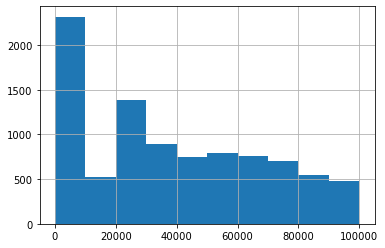

In [16]:
#show histogram of Income

mca['Income'].hist()

plt.show

In [17]:
#replace zeros with mean for Income

mean_income = np.sum(mca['Income'])/len(mca[mca['Income'] >0])
mca['Income'] = mca['Income'].replace(0,mean_income)

In [18]:
check_for_zeros(mca['Income'])

0

In [19]:
#Normalize Income with Box-Cox

from scipy import stats
xt1, lmbda = stats.boxcox(mca['Income'])

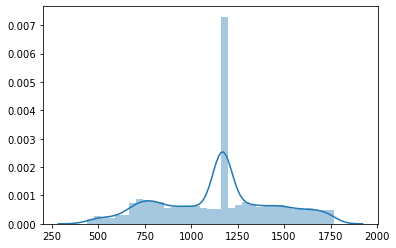

In [20]:
#show new distribution

sns.distplot(xt1)
plt.show()

maybe not smart to turn x zeros into mean?

In [24]:
#### Ask Andres ####

xt1.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
#show histogram of 'Months Since Last Claim'

mca['Months Since Last Claim'].hist()

plt.show

In [ ]:
#replace zeros with mean for 'Months Since Last Claim'

replace_zeros(['Months Since Last Claim'])

In [ ]:
#replace zeros with mean for Months Since Last Claim'

mean_income = np.sum(mca['Months Since Last Claim'])/len(mca[mca['Months Since Last Claim'] >0])
mca['Months Since Last Claim'] = mca['Months Since Last Claim'].replace(0,mean_income)

In [ ]:
#Normalize 'Months Since Last Claim' with Box-Cox

from scipy import stats
xt2, lmbda = stats.boxcox(mca['Months Since Last Claim'])

In [ ]:
#show new distribution

sns.distplot(xt2)
plt.show()

In [ ]:
#show histogram of 'Total Claim Amount'

mca['Total Claim Amount'].hist()

plt.show

In [ ]:
#replace zeros with mean for 'Total Claim Amount'

replace_zeros(['Total Claim Amount'])

In [ ]:
#replace zeros with mean for 'Total Claim Amount'

mean_income = np.sum(mca['Total Claim Amount'])/len(mca[mca['Total Claim Amount'] >0])
mca['Total Claim Amount'] = mca['Total Claim Amount'].replace(0,mean_income)

In [ ]:
#Normalize 'Total Claim Amount' with Box-Cox

from scipy import stats
xt3, lmbda = stats.boxcox(mca['Total Claim Amount'])

In [23]:
sns.distplot(xt3)
plt.show()

NameError: name 'xt3' is not defined

## Start with plotting everything into linear regression

In [27]:
# 1) Drop useless columns

In [ ]:
# 2) normalize, standardize - done

In [28]:
# 3) turn categorical variables into dummies  

In [26]:
# 4) x,y split - done

In [29]:
# 5) plor into linear regression

In [30]:
# 6) predict

In [31]:
# 7) test the model